In [2]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import plotly.express as px
from sklearn import preprocessing

In [3]:
df = pd.read_csv("DataSet1_3.csv", sep=',')
df["Date"] = df["Date"].astype("datetime64")
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
1,2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2,2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
3,2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
4,2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL
...,...,...,...,...,...,...,...
3014,2017-12-22,1070.00,1071.72,1067.64,1068.86,889446,GOOGL
3015,2017-12-26,1068.64,1068.86,1058.64,1065.85,918767,GOOGL
3016,2017-12-27,1066.60,1068.27,1058.38,1060.20,1116203,GOOGL
3017,2017-12-28,1062.25,1064.84,1053.38,1055.95,994249,GOOGL


In [4]:
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Name              object
dtype: object

In [5]:
df.nunique()

Date      3019
Open      2880
High      2855
Low       2875
Close     2919
Volume    3019
Name         1
dtype: int64

In [6]:
df = df.drop(columns="Name")

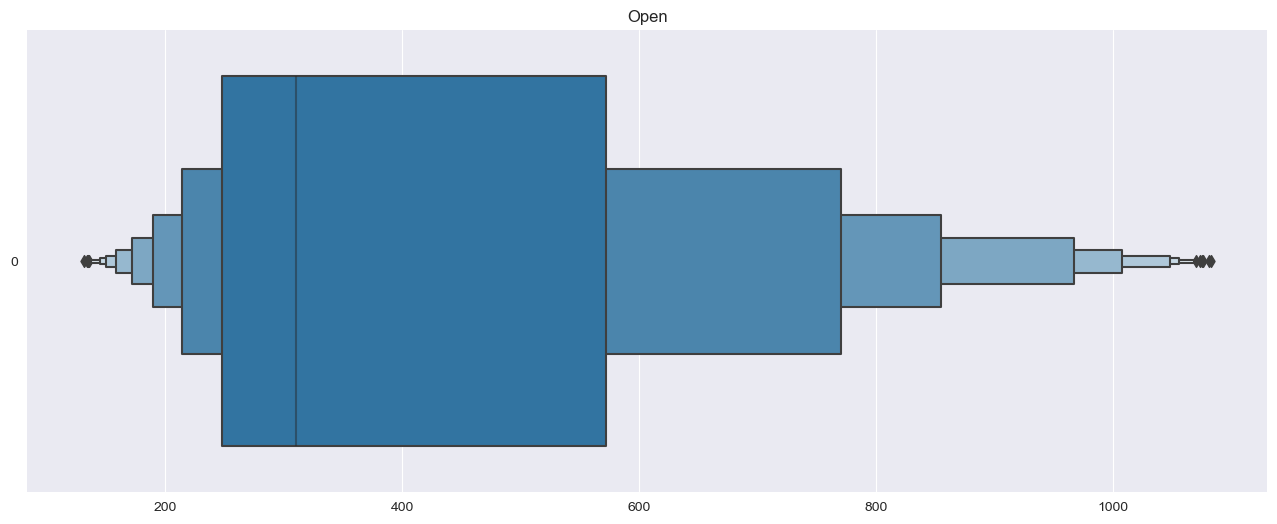

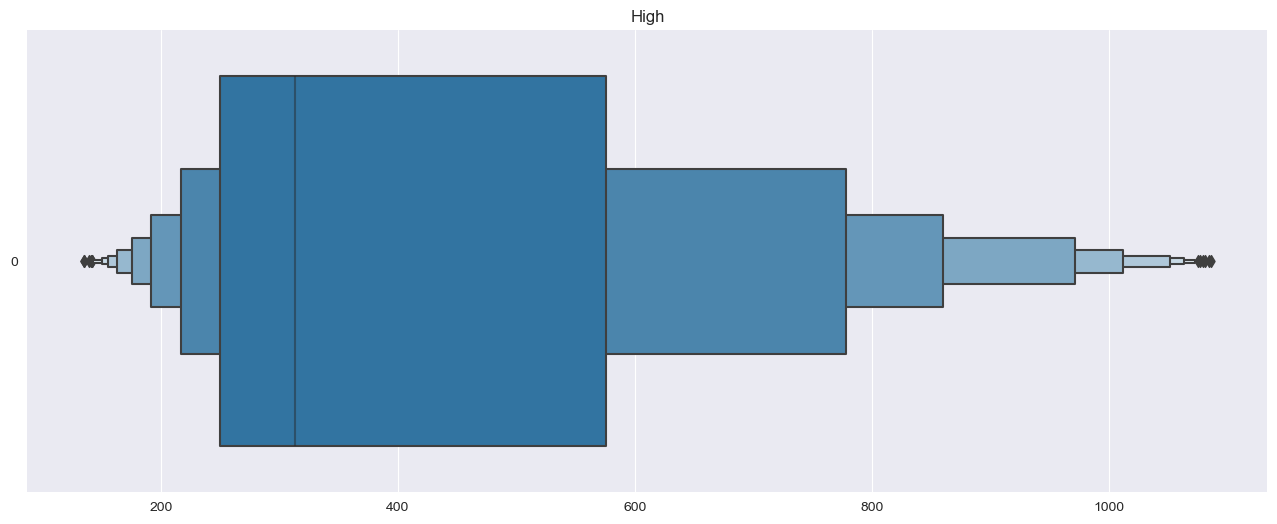

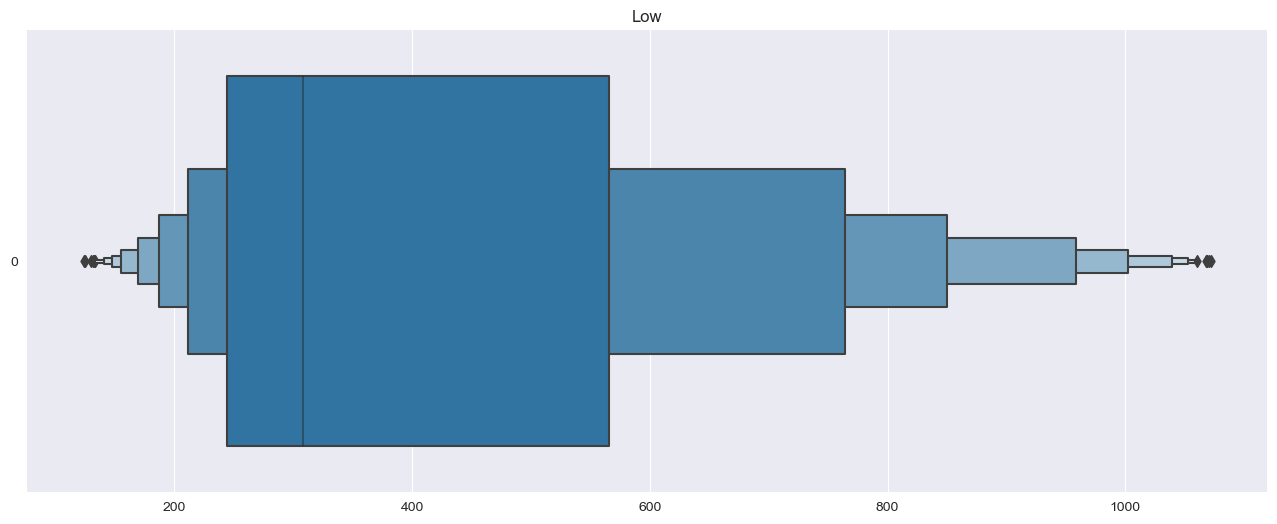

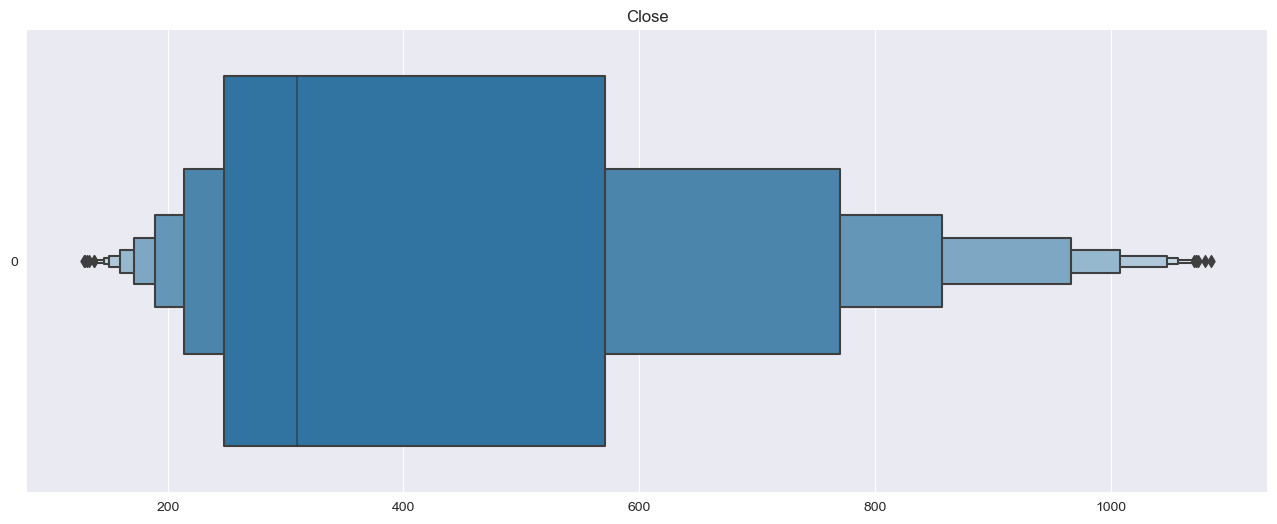

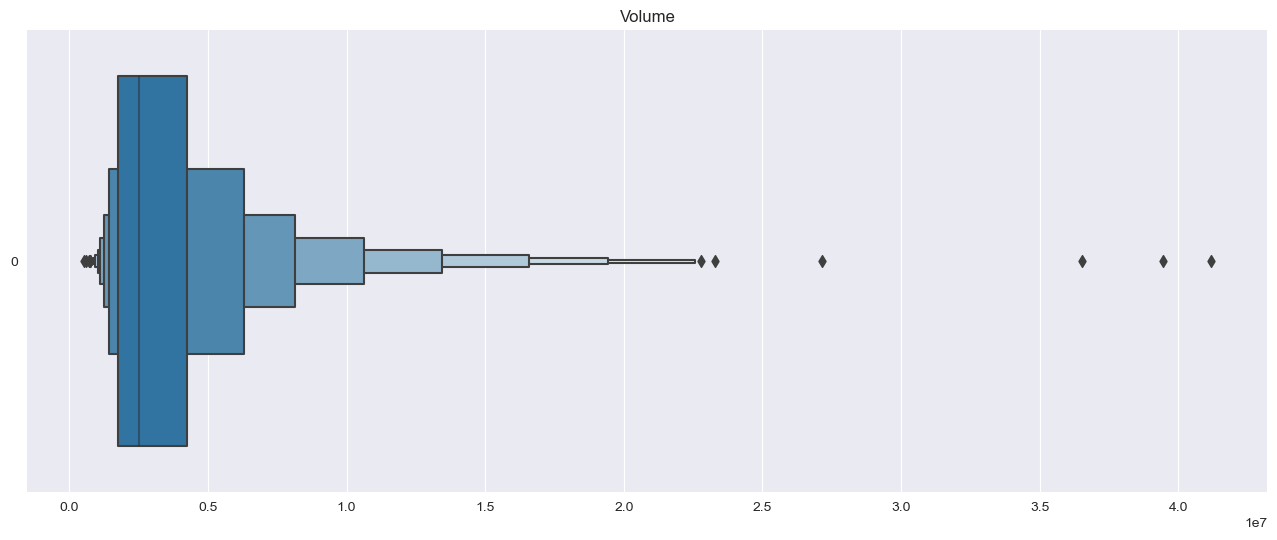

In [7]:
for col in df.columns.drop("Date"):
    f, ax = plt.subplots(figsize=(16, 6))
    ax.set_title(col)
    sns.boxenplot(data=df[col], orient="h")
    sns.despine(left=True, bottom=True)

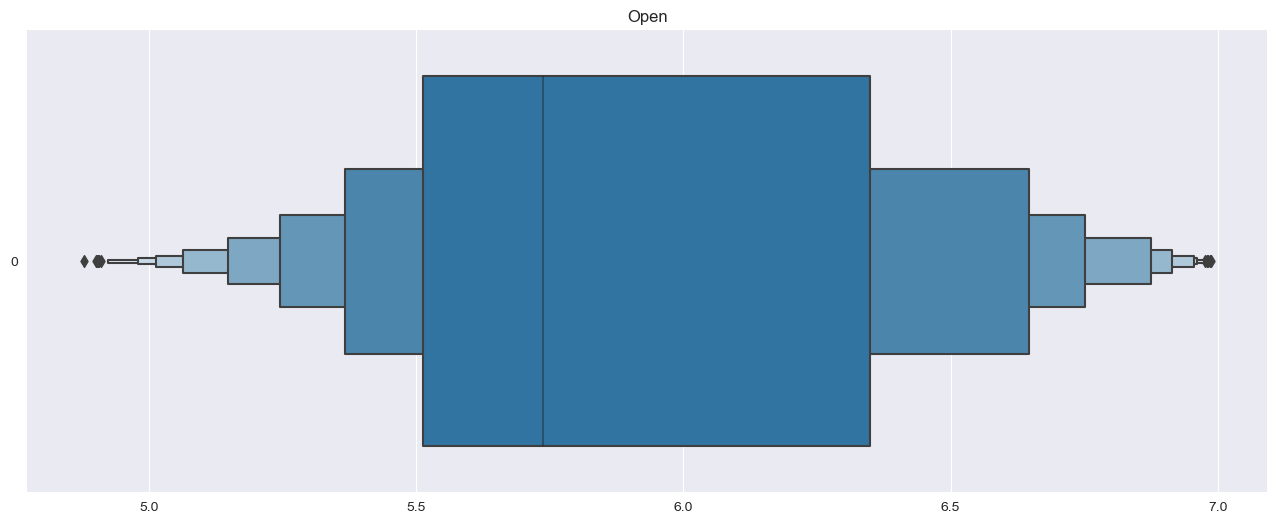

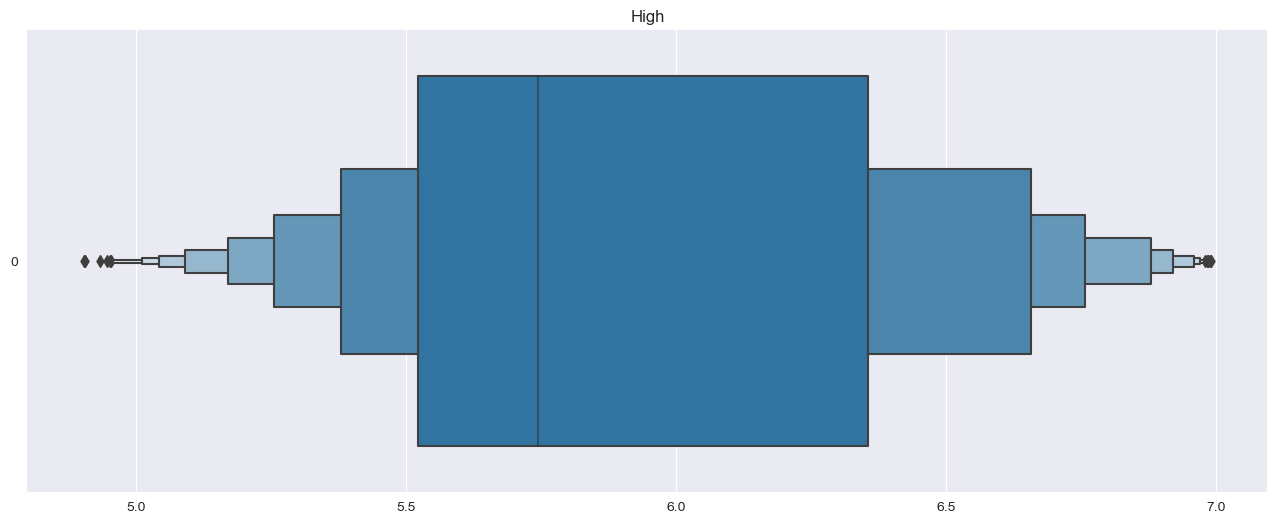

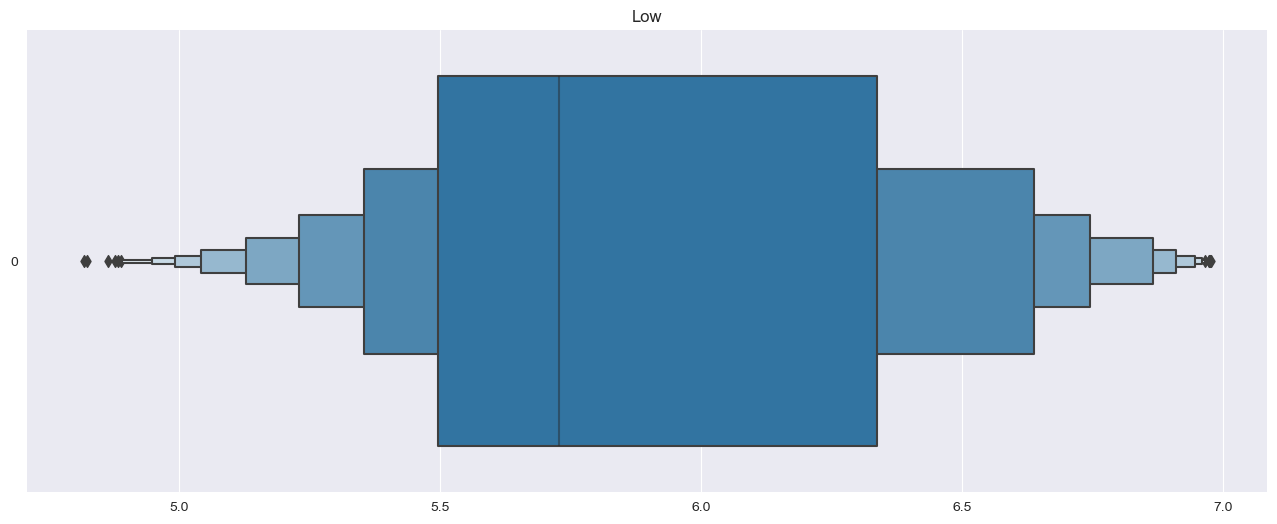

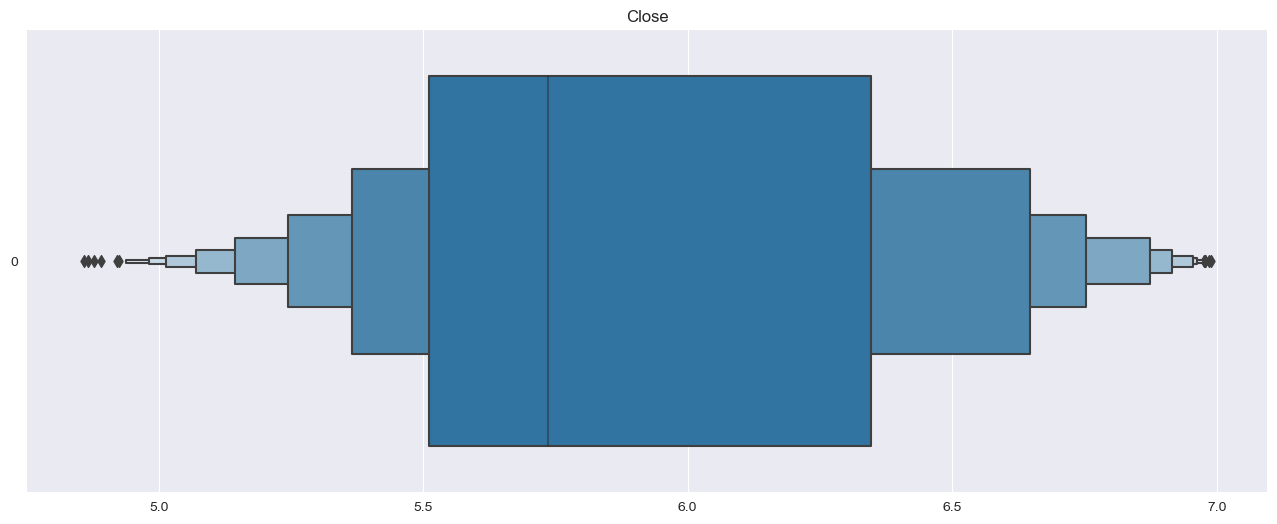

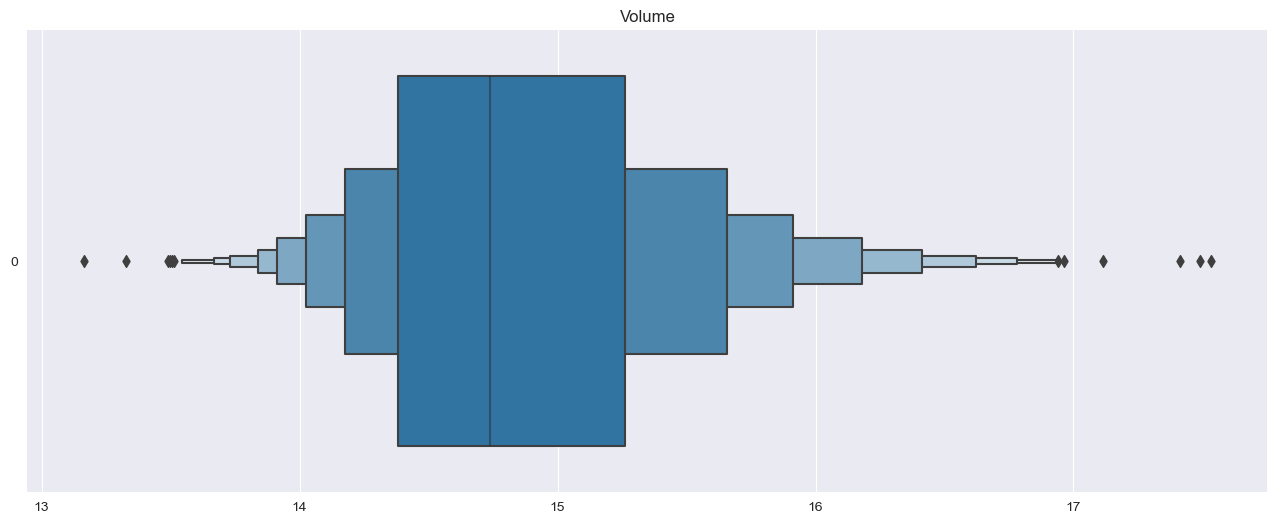

In [8]:
for col in df.columns.drop("Date"):
    f, ax = plt.subplots(figsize=(16, 6))
    ax.set_title(col)
    sns.boxenplot(data=np.log(df[col]), orient="h")
    sns.despine(left=True, bottom=True)

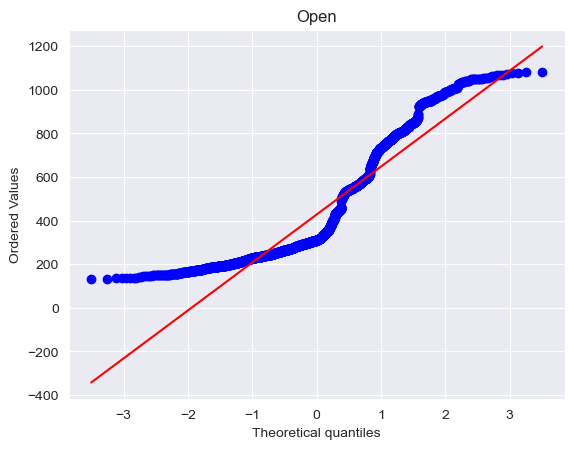

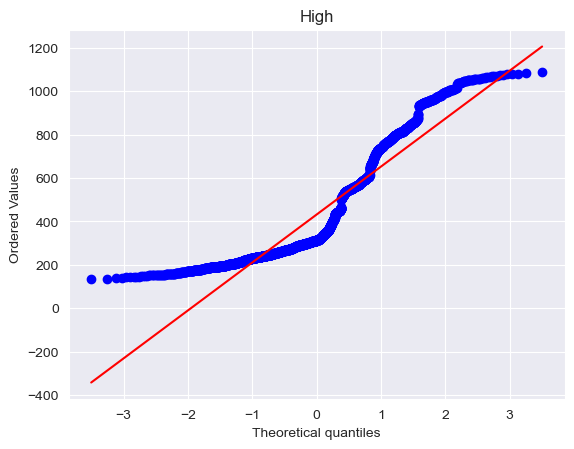

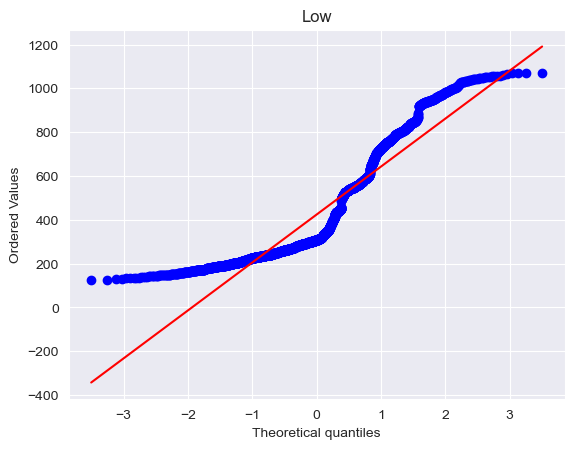

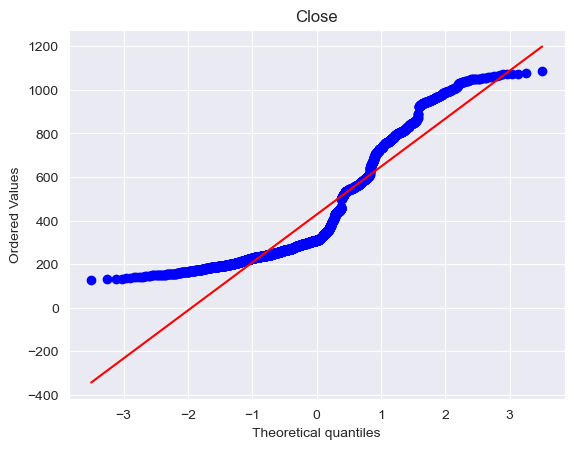

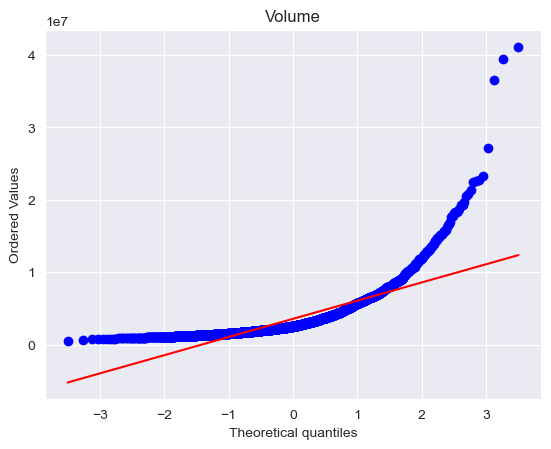

In [9]:
for col in df.columns.drop("Date"):
    stats.probplot(df[col], dist="norm", plot=pylab)
    pylab.title(col)
    pylab.show()

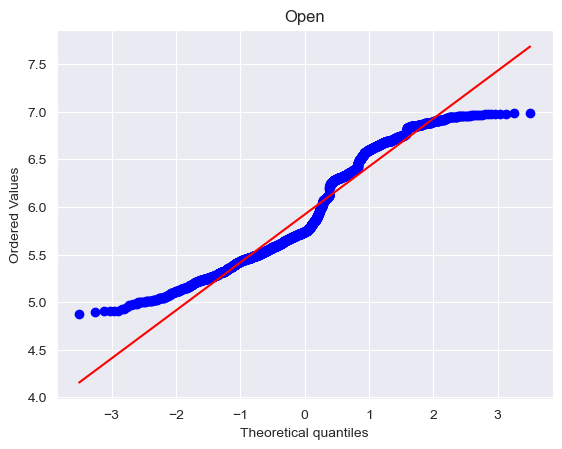

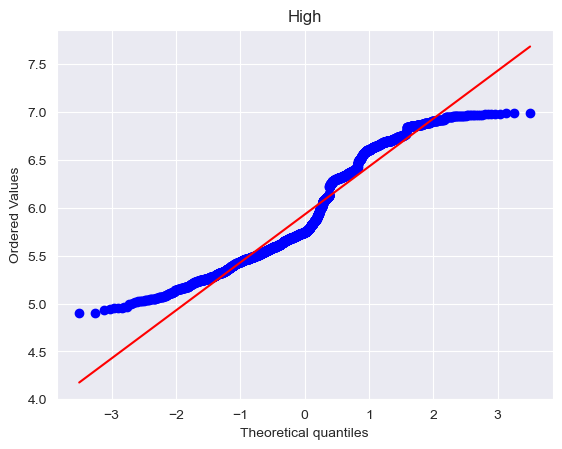

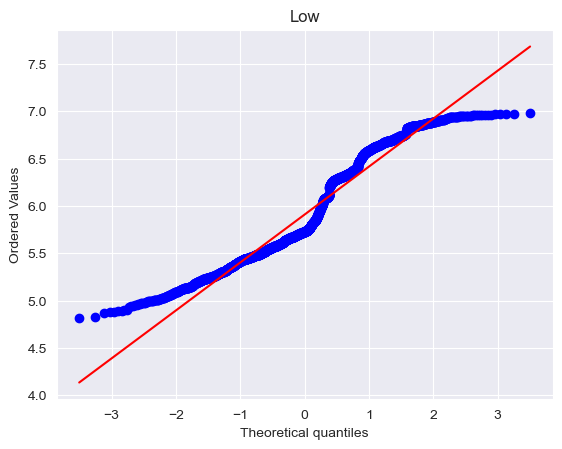

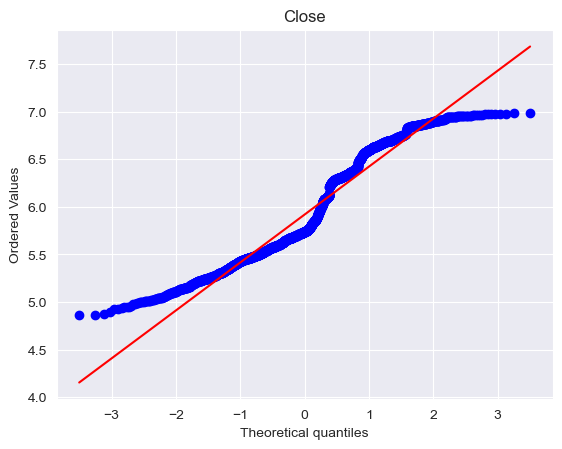

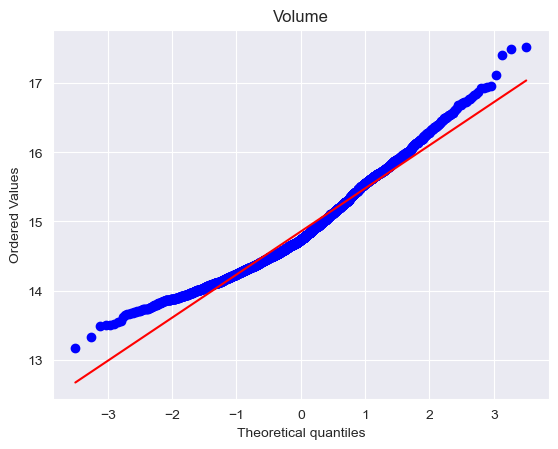

In [10]:
for col in df.columns.drop("Date"):
    stats.probplot(np.log(df[col]), dist="norm", plot=pylab)
    pylab.title(col)
    pylab.show()

In [16]:
np.abs(df.drop(columns="Date").corr()).style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume
Open,1.000000,0.999894,0.999841,0.999742,0.443155
High,0.999894,1.000000,0.999827,0.999866,0.440717
Low,0.999841,0.999827,1.000000,0.999896,0.447781
Close,0.999742,0.999866,0.999896,1.000000,0.444590
Volume,0.443155,0.440717,0.447781,0.444590,1.000000


In [17]:
np.abs(np.log(df.drop(columns="Date")).corr()).style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Volume
Open,1.000000,0.999831,0.999768,0.999614,0.651479
High,0.999831,1.000000,0.999711,0.999802,0.647506
Low,0.999768,0.999711,1.000000,0.999820,0.657857
Close,0.999614,0.999802,0.999820,1.000000,0.653019
Volume,0.651479,0.647506,0.657857,0.653019,1.000000


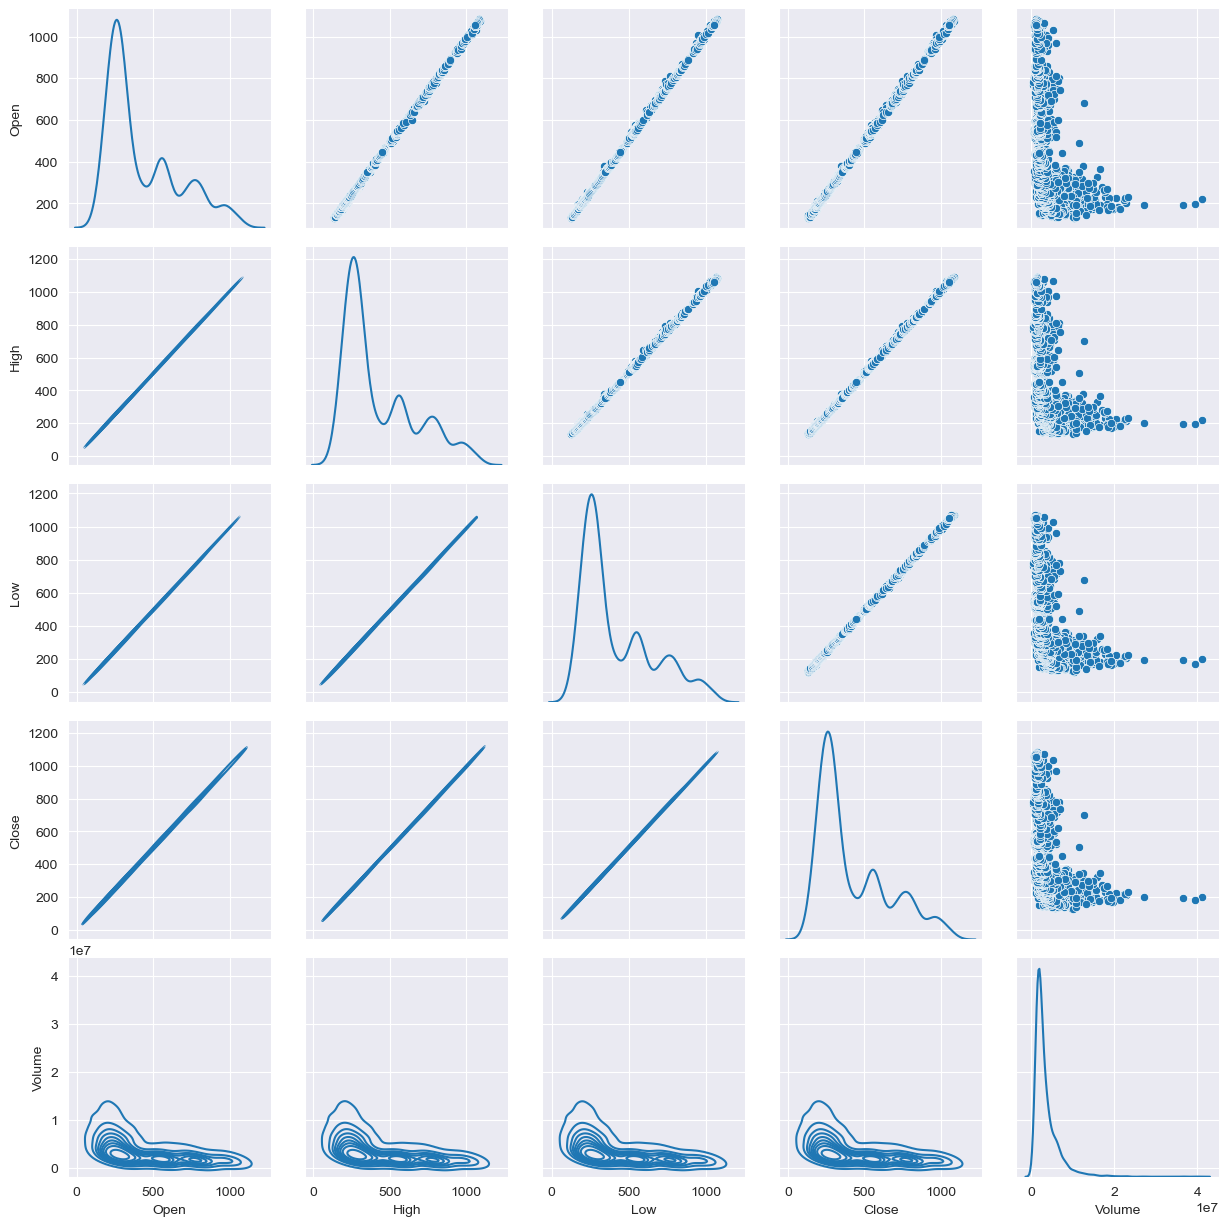

In [20]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot)